In [ ]:
# ECONOMETRICS FORECAST

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Charger le fichier CSV depuis votre ordinateur
uploaded = files.upload()

Saving Nat_Gas.csv to Nat_Gas.csv


       Dates  Prices
0   10/31/20   10.10
1   11/30/20   10.30
2   12/31/20   11.00
3    1/31/21   10.90
4    2/28/21   10.90
5    3/31/21   10.90
6    4/30/21   10.40
7    5/31/21    9.84
8    6/30/21   10.00
9    7/31/21   10.10
10   8/31/21   10.30
11   9/30/21   10.20
12  10/31/21   10.10
13  11/30/21   11.20
14  12/31/21   11.40
15   1/31/22   11.50
16   2/28/22   11.80
17   3/31/22   11.50
18   4/30/22   10.70
19   5/31/22   10.70
20   6/30/22   10.40
21   7/31/22   10.50
22   8/31/22   10.40
23   9/30/22   10.80
24  10/31/22   11.00
25  11/30/22   11.60
26  12/31/22   11.60
27   1/31/23   12.10
28   2/28/23   11.70
29   3/31/23   12.00
30   4/30/23   11.50
31   5/31/23   11.20
32   6/30/23   10.90
33   7/31/23   11.40
34   8/31/23   11.10
35   9/30/23   11.50
36  10/31/23   11.80
37  11/30/23   12.20
38  12/31/23   12.80
39   1/31/24   12.60
40   2/29/24   12.40
41   3/31/24   12.70
42   4/30/24   12.10
43   5/31/24   11.40
44   6/30/24   11.50
45   7/31/24   11.60
46   8/31/24 

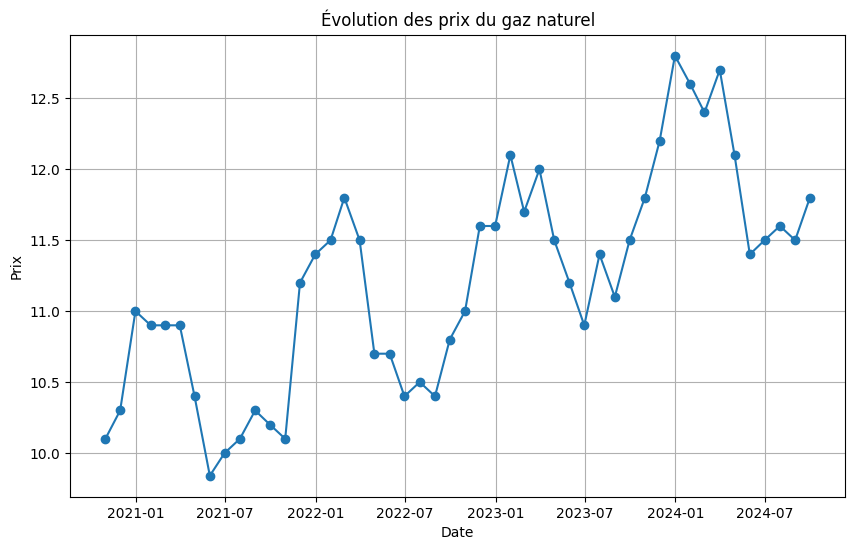

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -12.055
Date:                Thu, 07 Mar 2024   AIC                             36.109
Time:                        22:41:29   BIC                             47.210
Sample:                    10-31-2020   HQIC                            40.287
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.008      1.276      0.202      -0.005       0.025
ar.L1          1.6926      0.050     33.525      0.000       1.594       1.792
ar.L2         -0.9590      0.048    -19.946      0.0

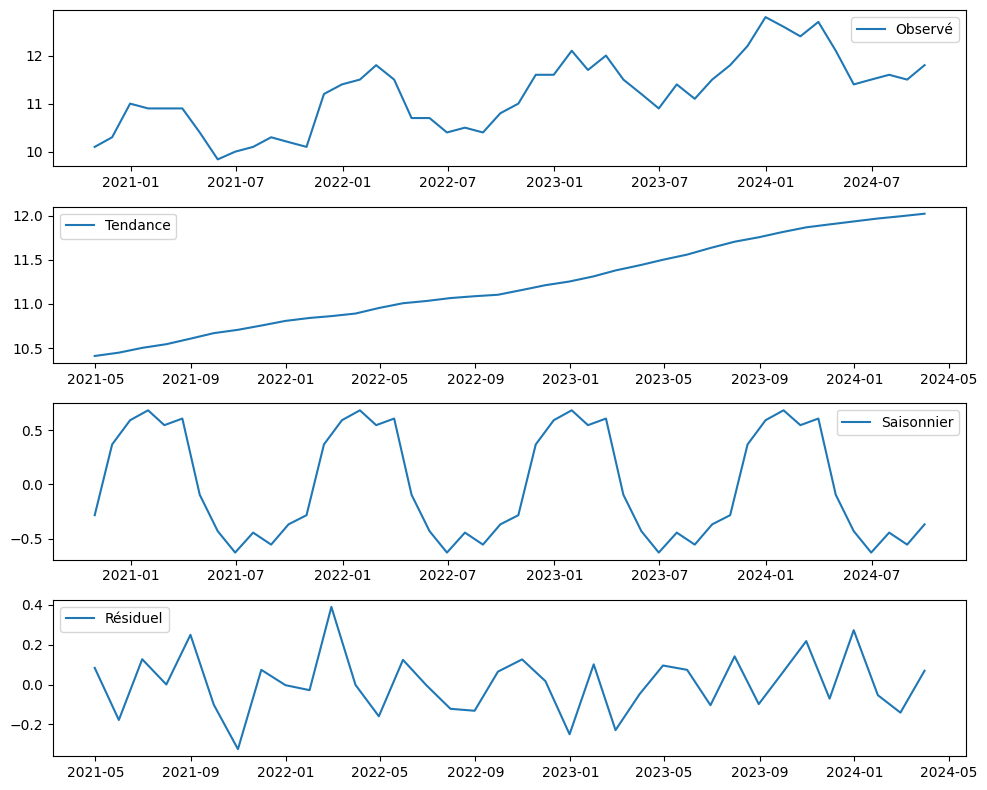

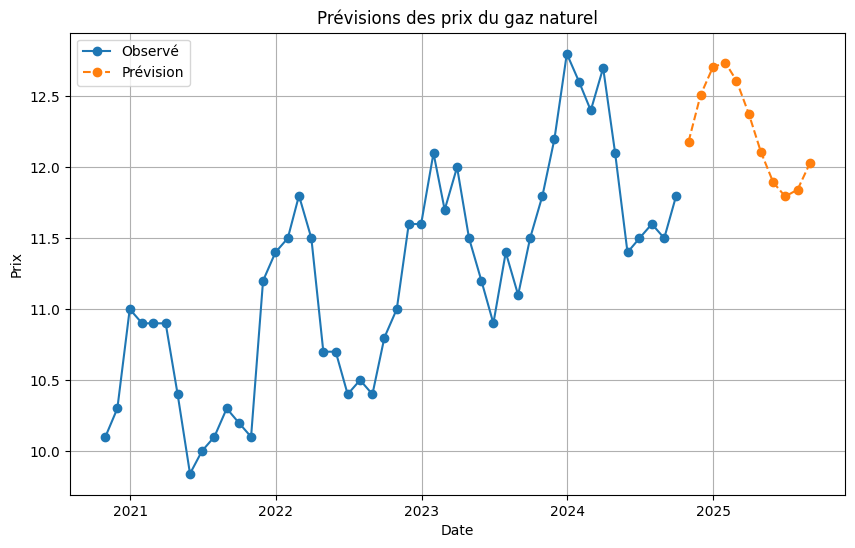

In [ ]:
# Lisez le fichier CSV en utilisant pandas
df = pd.read_csv("Nat_Gas.csv")

# Affichez le contenu du fichier CSV
print(df)

# Convertir la colonne 'Dates' en type datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# Tracer l'évolution des prix en fonction des dates
plt.figure(figsize=(10, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.title('Évolution des prix du gaz naturel')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

# Définir la colonne 'Dates' comme index du DataFrame
df.set_index('Dates', inplace=True)

# Créer et ajuster le modèle AutoARIMA
model = auto_arima(df['Prices'], seasonal=True, m=12)

# Résumé du modèle
print(model.summary())

# Prédire les prix du gaz naturel pour une année dans le futur
forecast = model.predict(n_periods=12)
print("Prévisions pour une année dans le futur :", forecast)

# Décomposer les séries chronologiques
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)

# Afficher les graphiques associés
plt.figure(figsize=(10, 8))

# Graphique de la série chronologique observée
plt.subplot(411)
plt.plot(df.index, decomposition.observed, label='Observé')
plt.legend()

# Graphique de la tendance
plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Tendance')
plt.legend()

# Graphique saisonnier
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Saisonnier')
plt.legend()

# Graphique résiduel
plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Résiduel')
plt.legend()

plt.tight_layout()
plt.show()

# Ajouter les prévisions au DataFrame
df_forecast = pd.DataFrame(forecast, index=pd.date_range(start=df.index[-1], periods=12, freq='M'), columns=['Forecast'])

# Fusionner les données observées et les prévisions
df_merged = pd.concat([df, df_forecast])

# Afficher les données observées et les prévisions sur un graphique
plt.figure(figsize=(10, 6))
plt.plot(df_merged.index, df_merged['Prices'], label='Observé', marker='o', linestyle='-')
plt.plot(df_merged.index, df_merged['Forecast'], label='Prévision', marker='o', linestyle='--')
plt.title('Prévisions des prix du gaz naturel')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Obtenir toutes les dates disponibles dans le DataFrame
dates_disponibles = df.index.tolist() + df_forecast.index.tolist()

# Créer un widget Dropdown pour la sélection de la date
date_dropdown = widgets.Dropdown(options=dates_disponibles, description='Sélectionnez une date')

# Fonction pour afficher la valeur prédite associée à la date sélectionnée
def afficher_prediction(date):
    if date in df.index:
        try:
            # Afficher la valeur observée si la date est dans les données observées
            observation = df.loc[date, 'Prices']
            print(f"Pour la date {date}, la valeur observée est : {observation}")
        except KeyError:
            print(f"Aucune valeur observée disponible pour la date {date}.")
    elif date in df_forecast.index:
        try:
            # Afficher la valeur prédite si la date est dans les prévisions
            prediction = df_forecast.loc[date, 'Forecast']
            print(f"Pour la date {date}, le prix prédit est : {prediction}")
        except KeyError:
            print(f"Aucune prévision disponible pour la date {date}.")
    else:
        print(f"Aucune donnée disponible pour la date {date}.")

# Fonction de rappel pour la sélection de la date
def on_date_change(change):
    date = change['new']
    afficher_prediction(date)

# Associer la fonction de rappel au widget de sélection de date
date_dropdown.observe(on_date_change, names='value')

# Afficher le widget de sélection de date
display(date_dropdown)




Dropdown(description='Sélectionnez une date', options=(Timestamp('2020-10-31 00:00:00'), Timestamp('2020-11-30…

Pour la date 2020-11-30 00:00:00, la valeur observée est : 10.3


In [ ]:
# DEEP LEARNING FORECAST

        Dates  Prices
0  2020-10-31   10.10
1  2020-11-30   10.30
2  2020-12-31   11.00
3  2021-01-31   10.90
4  2021-02-28   10.90
5  2021-03-31   10.90
6  2021-04-30   10.40
7  2021-05-31    9.84
8  2021-06-30   10.00
9  2021-07-31   10.10
10 2021-08-31   10.30
11 2021-09-30   10.20
12 2021-10-31   10.10
13 2021-11-30   11.20
14 2021-12-31   11.40
15 2022-01-31   11.50
16 2022-02-28   11.80
17 2022-03-31   11.50
18 2022-04-30   10.70
19 2022-05-31   10.70
20 2022-06-30   10.40
21 2022-07-31   10.50
22 2022-08-31   10.40
23 2022-09-30   10.80
24 2022-10-31   11.00
25 2022-11-30   11.60
26 2022-12-31   11.60
27 2023-01-31   12.10
28 2023-02-28   11.70
29 2023-03-31   12.00
30 2023-04-30   11.50
31 2023-05-31   11.20
32 2023-06-30   10.90
33 2023-07-31   11.40
34 2023-08-31   11.10
35 2023-09-30   11.50
36 2023-10-31   11.80
37 2023-11-30   12.20
38 2023-12-31   12.80
39 2024-01-31   12.60
40 2024-02-29   12.40
41 2024-03-31   12.70
42 2024-04-30   12.10
43 2024-05-31   11.40
44 2024-06

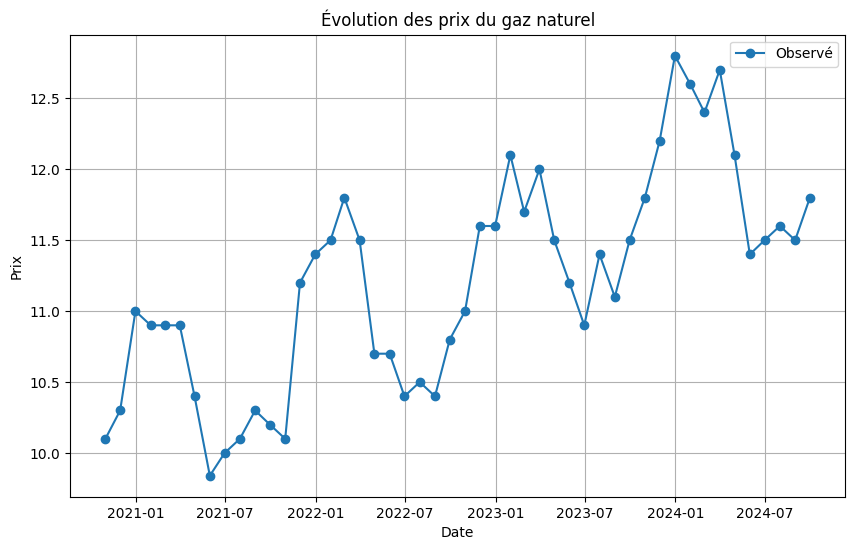

Epoch 1/500
3/3 [==============================] - 4s 24ms/step - loss: 0.3096
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 0.2324
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1672
Epoch 4/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1109
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0647
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0379
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0524
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0611
Epoch 9/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0505
Epoch 10/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0427
Epoch 11/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0418
Epoch 12/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0417
Epoch 13/500
3/3 [==============================]

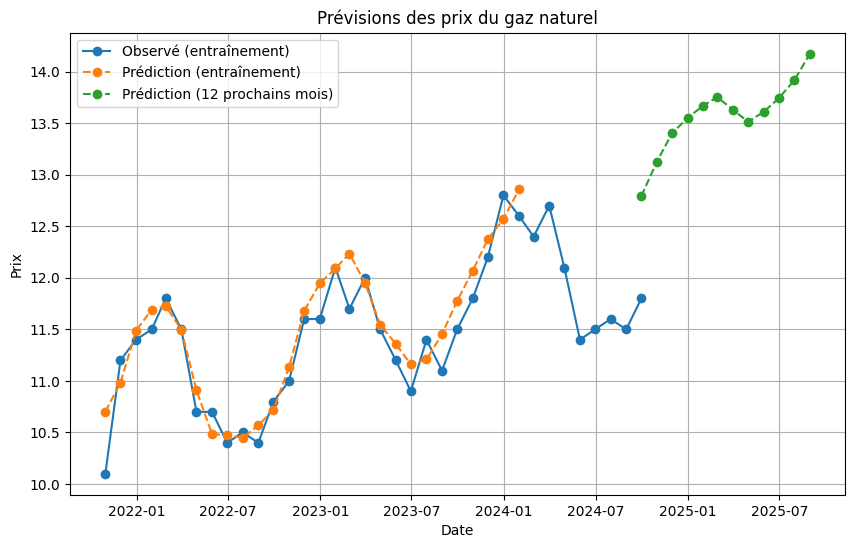

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv("Nat_Gas.csv")

# Convertir la colonne 'Dates' en type datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# Afficher les données du fichier CSV
print(df)

# Tracer l'évolution des prix en fonction des dates
plt.figure(figsize=(10, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-', label='Observé')
plt.title('Évolution des prix du gaz naturel')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()

# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(df['Prices'].values.reshape(-1, 1))

# Création des séquences temporelles pour l'entraînement du modèle
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12  # Longueur de la séquence temporelle
X, y = create_sequences(scaled_prices, sequence_length)

# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construction du modèle LSTM
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compilation du modèle
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=500, batch_size=12, verbose=1)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Dénormalisation des prédictions
y_pred_denormalized = scaler.inverse_transform(y_pred)

# Prédire les prix du gaz naturel pour les 12 prochaines périodes
last_sequence = scaled_prices[-sequence_length:]
forecast = []
for _ in range(12):
    next_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    forecast.append(next_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_prediction

# Dénormaliser les prévisions
forecast_denormalized = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Prédire les prix sur toute la période d'entraînement
y_train_pred = model.predict(X_train)

# Dénormaliser les prédictions pour toute la période d'entraînement
y_train_pred_denormalized = scaler.inverse_transform(y_train_pred)

# Créer l'index pour les prévisions sur toute la période d'entraînement
index_train_pred = pd.date_range(start=df['Dates'].iloc[sequence_length], periods=train_size, freq='M')

# Créer l'index pour les prévisions des 12 prochains mois
index_forecast = pd.date_range(start=df['Dates'].iloc[-1], periods=12, freq='M')

# Afficher les prévisions sur toute la période d'entraînement et les 12 prochains mois
plt.figure(figsize=(10, 6))
plt.plot(df['Dates'].iloc[sequence_length:], df['Prices'].iloc[sequence_length:], marker='o', linestyle='-', label='Observé (entraînement)')
plt.plot(index_train_pred, y_train_pred_denormalized, marker='o', linestyle='--', label='Prédiction (entraînement)')
plt.plot(index_forecast, forecast_denormalized, marker='o', linestyle='--', label='Prédiction (12 prochains mois)')
plt.title('Prévisions des prix du gaz naturel')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Assurez-vous que 'index_forecast' est le bon index pour vos 12 prévisions futures
# Créez un DataFrame pour les prévisions avec les dates comme index
df_forecast = pd.DataFrame(forecast_denormalized, index=index_forecast, columns=['Forecast'])

# Convertir 'index_forecast' en format de chaîne pour l'affichage dans le widget Dropdown
dates_forecast_str = index_forecast.strftime('%Y-%m-%d')

# Créer un widget Dropdown pour la sélection de la date de prévision
date_dropdown = widgets.Dropdown(options=dates_forecast_str, description='Sélectionnez une date:', style={'description_width': 'initial'})

# Fonction pour afficher la valeur prédite associée à la date sélectionnée
def afficher_prediction(date_str):
    # Trouver la prévision pour la date sélectionnée
    prediction = df_forecast.loc[pd.to_datetime(date_str), 'Forecast']
    print(f"Pour la date {date_str}, la prévision est : {prediction:.2f}")

# Fonction de rappel pour la sélection de la date
def on_date_change(change):
    afficher_prediction(change['new'])

# Associer la fonction de rappel au widget de sélection de date
date_dropdown.observe(on_date_change, names='value')

# Afficher le widget de sélection de date
display(date_dropdown)


Dropdown(description='Sélectionnez une date:', options=('2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'…

Pour la date 2024-10-31, la prévision est : 13.13
